In [ ]:
#@title MobileNet

In [ ]:
#@title Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import keras
import pathlib
import numpy as np
import tensorflow as tf
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2

In [2]:
#@title Preparing The Data
data_dir="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/train"
data_dir = pathlib.Path(data_dir)

In [3]:
img_height,img_width=(224,224)
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 4536 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 1134 files for validation.


In [5]:
print(train_ds.class_names)

['Overripe', 'Ripe', 'Unripe']


In [6]:
# Load the MobileNetV2 model with pre-trained weights on ImageNet
# put your classes in number
num_classes=3
base_model = MobileNetV2(include_top=False,weights="imagenet",
                         input_shape=(224,224, 3),
                         classes=num_classes,classifier_activation="softmax",
                         pooling="max")

In [7]:
# Freeze base model layers (optional for fine-tuning)
base_model.trainable = False

In [8]:
# Add custom layers for new classification (replace 3 with your class count)
x = base_model.output
x = Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(units=512, activation="relu")(x)
predictions = Dense(units = num_classes, activation="softmax")(x)  # Output layer with your class count (softmax for probability distribution)

In [9]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [11]:
epoch=50

my_callbacks = [
    # save logs while training in csv file
    keras.callbacks.CSVLogger('C:/Users/chand/Documents/Github/MobileNetv2/Logs/log.csv', separator=",", append=False),
    # keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
    ]

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Train the model
history=model.fit(train_ds, validation_data=val_ds,
                  epochs=epoch,
                  callbacks=[my_callbacks],
                  batch_size=32,verbose=1)

Epoch 1/50
142/142 [==============================] - 11s 41ms/step - loss: 1.5504 - accuracy: 0.4974 - val_loss: 0.8823 - val_accuracy: 0.5802
Epoch 2/50
142/142 [==============================] - 6s 39ms/step - loss: 0.8699 - accuracy: 0.5897 - val_loss: 0.8195 - val_accuracy: 0.6146
Epoch 3/50
142/142 [==============================] - 6s 38ms/step - loss: 0.7918 - accuracy: 0.6310 - val_loss: 0.8151 - val_accuracy: 0.6041
Epoch 4/50
142/142 [==============================] - 6s 39ms/step - loss: 0.7787 - accuracy: 0.6393 - val_loss: 0.7833 - val_accuracy: 0.6243
Epoch 5/50
142/142 [==============================] - 6s 41ms/step - loss: 0.7451 - accuracy: 0.6578 - val_loss: 0.7879 - val_accuracy: 0.6129
Epoch 6/50
142/142 [==============================] - 6s 43ms/step - loss: 0.7183 - accuracy: 0.6720 - val_loss: 0.7412 - val_accuracy: 0.6517
Epoch 7/50
142/142 [==============================] - 6s 44ms/step - loss: 0.7033 - accuracy: 0.6784 - val_loss: 0.7752 - val_accuracy: 0.630

In [14]:
#@title save final model
model.save('C:/Users/chand/Documents/Github/MobileNetv2/Model/Mobilenet.h5')

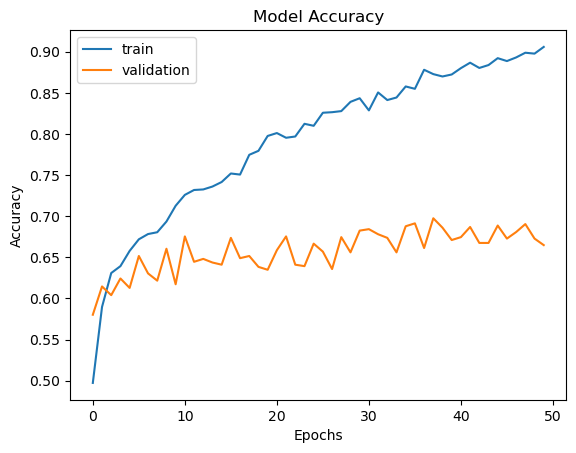

In [15]:
#@title accuracy graph
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

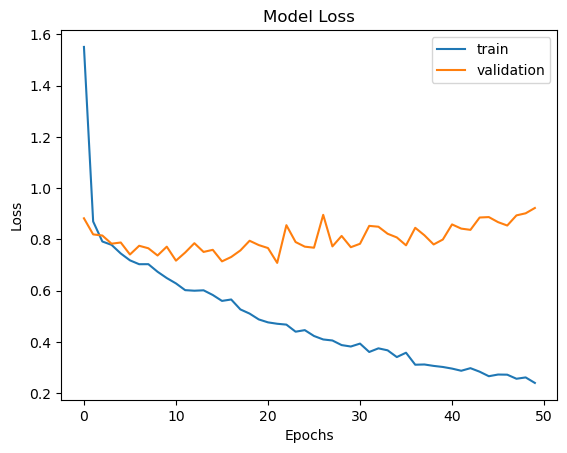

In [16]:
#@title loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix

In [3]:
image_generator = keras.preprocessing.image.ImageDataGenerator()
test_data="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test"
test_image_data  = image_generator.flow_from_directory(test_data,target_size=(224,224), batch_size=700)

Found 630 images belonging to 3 classes.


In [4]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (630, 224, 224, 3)
Label batch shape:  (630, 3)


In [5]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

20/20 [==============================] - 5s 242ms/step


In [6]:
from sklearn.metrics import classification_report
target_names = ['overripe', 'ripe', 'unripe']
print(classification_report(label_id, predicted_id, zero_division=0, target_names=target_names))

              precision    recall  f1-score   support

    overripe       0.44      0.30      0.36       210
        ripe       0.40      0.60      0.48       210
      unripe       0.62      0.52      0.56       210

    accuracy                           0.47       630
   macro avg       0.49      0.47      0.47       630
weighted avg       0.49      0.47      0.47       630



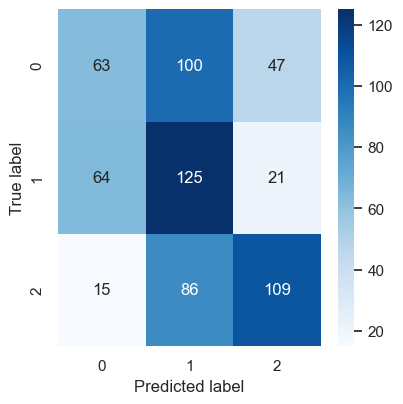

In [7]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

# Compute confusion matrix
con_mat = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

# Create the plot
figure = plt.figure(figsize=(4,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# load model

In [2]:
# Load the trained model
model = load_model('C:/Users/chand/Documents/Github/MobileNetv2/Model/Mobilenet.h5')

# Prediction

1/1 [==============================] - 0s 18ms/step
1. Unripe: 67.28%
2. Ripe: 32.72%
3. Overripe: 0.00%


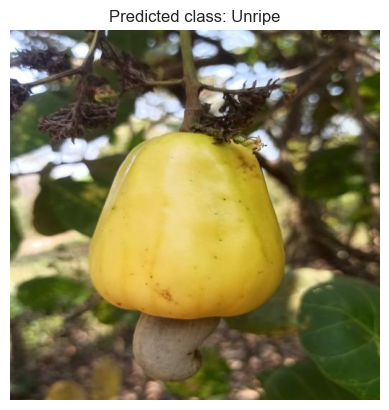

In [43]:
# Load an image to make predictions on
# img_path = "C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test/Ripe/20240305_123158_jpg.rf.ad70621ecc5701a2fd745fa0bc4272c8_4.jpg"
img_path = "C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test/Unripe/IMG_20240305_122722_jpg.rf.cd2ee6b767a00db7e951b9dbbf3f390f_3.jpg"
img = image.load_img(img_path, target_size=(224,224))  # input size

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make predictions
predictions = model.predict(x)

# Decode the predictions manually
class_labels = sorted(os.listdir("C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test"))

# Decode the top predictions
top_predictions = np.argsort(predictions[0])[::-1][:3] # Top 3 predictions
highest_prediction_idx = top_predictions[0] 

for i, idx in enumerate(top_predictions):
    label = class_labels[idx]
    score = predictions[0][idx]
    print("{}. {}: {:.2f}%".format(i + 1, label, score * 100))

highest_prediction_label = class_labels[highest_prediction_idx]

img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Predicted class: {}'.format(highest_prediction_label))
plt.axis('off')
plt.show()